# Chapter examples and illustrations

In [11]:
# Dave Hunt
# University of Washington
# March 27, 2021

# This notebook plots patch encounter data generated from sets of correlated random walks (~100 walks x 10,000 steps) 
# at varying concentrations, utilizing the CRWutils.py module

#  CRW/ 
#    │
#    ├──src/
#    │   └──CRWutils.py
#    │
#    ├──notebooks/
#    │   └── Chapter examples and illustrations.ipynb
#    │
#    ├──data/
#    │   └── all csv results *.csv from random walks
#    │
#    └──graphs/
#        └── all graphs created from csv data
#

This notebook provides the code used to create examples and illustrations in my dissertation chapter "A biased model of stone raw material acquisition"

In [1]:
%cd d:\\dev\Python\CRW\src

d:\dev\Python\CRW\src


In [2]:
# included libraries
import sys
import numpy as np
import pandas as pd
import CRWutils as crw
from scipy.stats import wrapcauchy

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker

from cycler import cycler
from datetime import datetime

In [3]:
%cd d:\\dev\Python\CRW

d:\dev\Python\CRW


# Figure 3

Figure 3 is an example of a set of 100 simple, random walks of 10,000 steps each, within a 200x200 grid. In this case, a correlated random walk with rho = 0 mimics the behavior of a simple random walk.

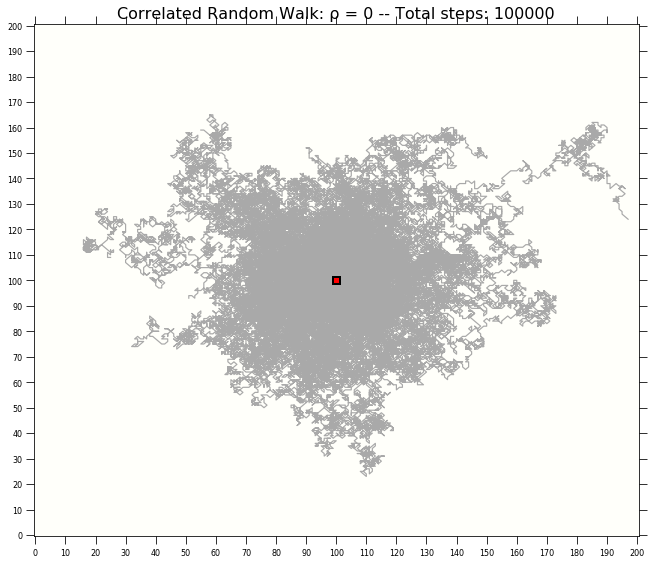

In [6]:
num_of_walks = 100
num_of_steps = 1000
rho = 0                                             # used to mimic a simple random walk

crw.initialize_grid(200,200)
crw.reset_variables()                               # initialization
crw.prob_list = crw.get_prob_list(rho)              # mimic a simple random walk (SRW)
offset_X = 98                                       # move the patch out of the way (we don't show it)
offset_Y = 98

patch_size = 1
crw.place_patch(crw.lithics, patch_size, crw.startX-offset_X, crw.startY-offset_Y)   # we have to place a patch, even if we don't show it
crw.take_first_encounter_walk(num_of_walks, num_of_steps)                            # run the walks
 
label = chr(961) + ' = ' + str(rho)
crw.plot_walk(label, num_of_walks, False)           # create the plot


# Figure 4

Figure 4 illustrates how modulating the concentration parameter, rho, affects the Cauchy distribution.

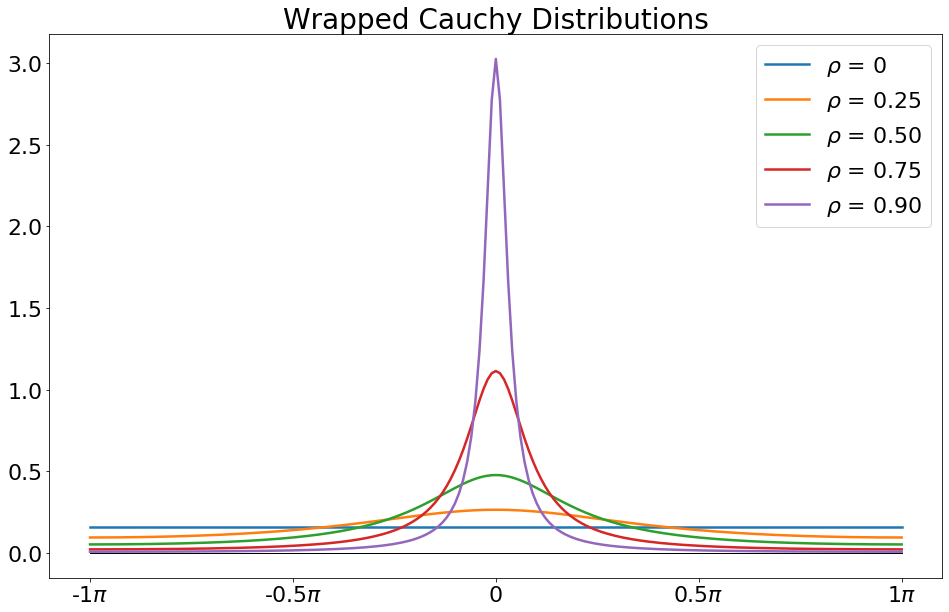

In [7]:
fig = plt.figure(figsize=(16,10))                               # create the drawing fram
gs = GridSpec(1,1)
ax = fig.add_subplot(gs[0])    

crw.wrapped_Cauchy(0)                                           # create plots using rho = 0, 0.25, 0.5, 0.75, and 0.90
crw.wrapped_Cauchy(0.25)
crw.wrapped_Cauchy(0.50)
crw.wrapped_Cauchy(0.75)
crw.wrapped_Cauchy(0.90)
#crw.wrapped_Cauchy(0.95)

plt.plot(np.linspace(-np.pi, np.pi, 20), [0]*20, c='k', lw=1)   # x-axis range
plt.title('Wrapped Cauchy Distributions', fontsize=28)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.legend(loc='best', fontsize=22)

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi/2))

#plt.savefig('WC_multiple_dists.png')                          # option to save the image

# Figure 5

Figure 5 is a compilation using the code below to plot the wrapped Cauchy distribution around a unit circle. This example is replicating the Figure 5.c, using rho=0.75.  The other examples can be replicated by changing the value for rho in line 4.  

(array([1, 2, 3]), <a list of 3 Text yticklabel objects>)

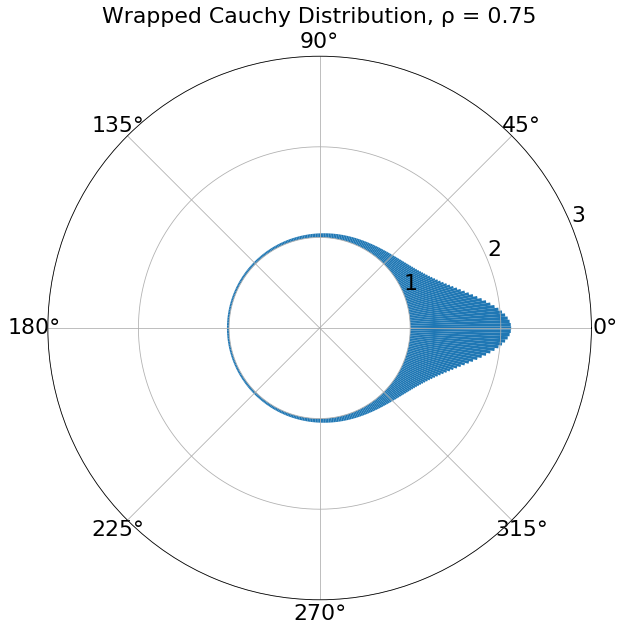

In [8]:
fig = plt.figure(figsize=(10,10))                                 # create the figure frame
gs = GridSpec(1,1)
ax = fig.add_subplot(gs[0])   

rho = 0.75                                                        # the concentration to use

N = 360                                                           # create 360 "slices" of the prob distribution
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)            # spreads 360 points over pi to -pi
pcc = wrapcauchy.pdf(theta, rho)                                  # produces the probability distribution around 360 degrees
width = (2*np.pi) / N                                             # determines bar width 

ax = plt.subplot(polar=True)                                      # set graph type = polar
bottom = 1                                                        # to wrap around a unit circle this is 1
bars = ax.bar(theta, pcc, width=width, bottom=bottom)             # draws all the bars
ax.set_title('Wrapped Cauchy Distribution, ' + chr(961) + ' = ' + str(rho), fontsize=22)
ax.set_ylim(0,3)
ax.set_yticks(np.arange(1, 4, 1))
ax.set_rlabel_position(22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

#plt.savefig('WC_dist_rho_075.png')                               # option to save the image

# Figure 6

Figure 6 is a wrapped Cauchy distribution (rho = 0.75) divided into 8 "nearest neighbor" octants A - H, with A representing forward motion and E representing reverse direction. The distribution is oriented to the "north" to illustrate forward motion.

Text(0, 0.2, 'Unit circle')

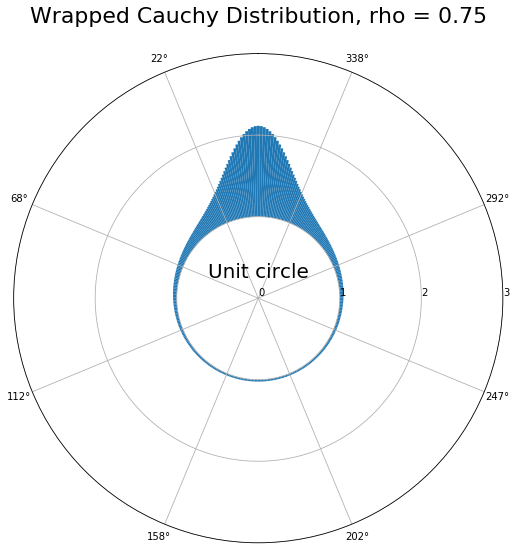

In [9]:
rho = 0.75
if rho <= 0:                       # restrict rho to the range 0  to 1
    rho = tiny_number              # exactly zero returns no results, so use tiny_number (0.0000000001)
if rho >= 1:                        
    rho = almost_One               # exactly 1 returns infinity at 0 degrees, so use almost_One (0.99)

fig = plt.figure(figsize=(16,9))

N = 360                                                  # create 360 "slices" of the prob distribution
width = (2*np.pi) / N                                    # determines bar width 
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)   # spreads 360 points over pi to -pi
pcc = wrapcauchy.pdf(theta, rho)                         # produces the probability distribution around 360 degrees

ax = plt.subplot(polar=True)                             # set graph type = polar
ax.set_theta_zero_location('N')                          # set orientation to North
bottom = 1                                               # to wrap around a unit circle this is 1
max_height = 4
bars = ax.bar(theta, pcc, width=width, bottom=bottom)    # draws all the bars

ax.set_xticks(np.arange(2* np.pi/16, 2*np.pi, np.pi/4.0))
plt.rc('xtick', labelsize=16)
ax.set_yticks(np.arange(0, pcc[0]+1.5, 0.5))
ax.set_ylim(0,2)
plt.rc('ytick', labelsize=16)

if pcc[0] < 10:                                          # manages the y ticks if the concentration at 0 degrees is big
    ax.set_yticks(np.arange(0, pcc[0]+2, 1))
else:
    ax.set_yticks(np.arange(0, pcc[0]+1.5, round(pcc[0]/10)+ 10))   

ax.set_title('Wrapped Cauchy Distribution, rho = %.2f' % rho, fontsize=22)
ax.set_rlabel_position(-90)

ax.annotate('Unit circle',
            xy=(0, 0.2), xycoords='data',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=20)

#plt.savefig('WC_dist_rho_075_8directions.png')

# Figure 7

Figure 7 illustrates how the concentration parameter (rho) affects directional persistence of the walk. Four walks of 100 steps each illustrate varying levels of rho.

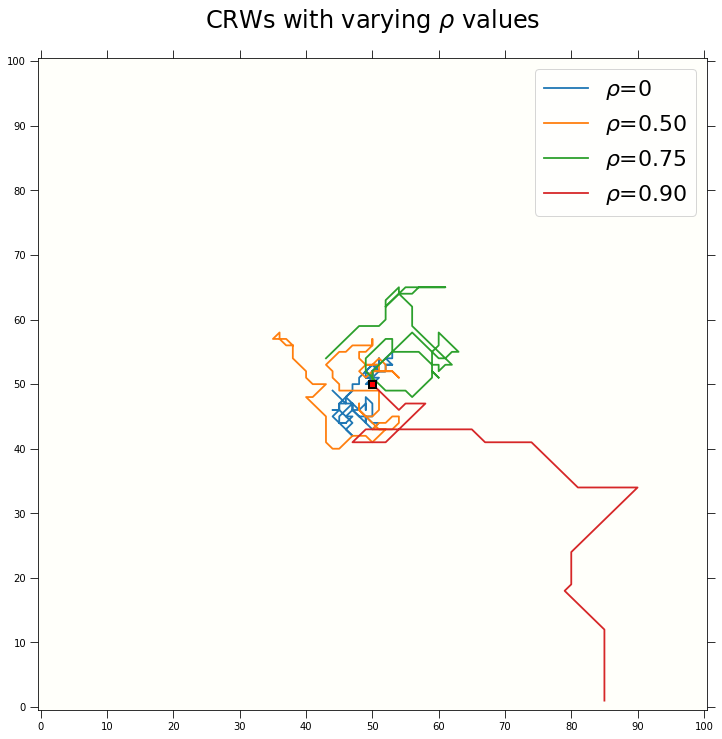

In [10]:
num_of_walks = 1          # we'll do one walk for value of rho
num_of_steps = 100
crw.initialize_grid(100,100)
crw.reset_variables()
walk_results = []         # all walk results are saved here

patch_size = 1            # we won't actually show the patch for this figure, but we need to set the size
offset_X = 48             # same, need to set the patch offsets, this moves the patch well away from center
offset_Y = 48             # same
crw.place_patch(crw.lithics, patch_size, crw.startX-offset_X, crw.startY-offset_Y)  # each set of walks needs a patch, even if we don't show it
      
    
rho = 0                                                      # run walks for various values of rho
crw.prob_list = crw.get_prob_list(rho)
crw.take_first_encounter_walk(num_of_walks, num_of_steps)    # run the walks

rho = 0.50
crw.prob_list = crw.get_prob_list(rho)
crw.take_first_encounter_walk(num_of_walks, num_of_steps)    # run the walks

rho = 0.75
crw.prob_list = crw.get_prob_list(rho)
crw.take_first_encounter_walk(num_of_walks, num_of_steps)    # run the walks

rho = 0.90
crw.prob_list = crw.get_prob_list(rho)
crw.take_first_encounter_walk(num_of_walks, num_of_steps)    # run the walks


fig = plt.figure(figsize=(12,12))                            # create the figure framework
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])


rho_list = ['=0', '=0.50', '=0.75', '=0.90']                # for the legend
index = 0
stepStart = 0 
for z in crw.stepBreak:                                     # use the stepBreak index to divide out the individual walk lines for plotting
    xdata = crw.steps[stepStart:z-1, 0]
    ydata = crw.steps[stepStart:z-1 ,1]
    line1, = ax1.plot([], [], lw=1.8, label = r'$\rho$' + rho_list[index])   
    index += 1
    line1.set_data(xdata, ydata)                           # create the individual walk line
    stepStart = z

ax1.plot(crw.steps[0,0], crw.steps[0,0], 'rs', ms=7, markeredgecolor='black', markeredgewidth=2)        # home marker   
ax1.set_title(r'CRWs with varying $\rho$ values', fontsize=24, pad=30)
ax1.legend(loc='best', fontsize=22)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'b', 'm', 'g'])))      # each walk gets a different color

ax1.set_facecolor('#fffffa')  
ax1.set_ylim(-0.5, ((crw.gridsize_X) + 0.5))
ax1.set_xlim(-0.5, ((crw.gridsize_Y) + 0.5))

ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.xaxis.set_minor_locator(AutoMinorLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=10)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=10)

#plt.savefig('CRW_multiple_rhos.png')                      # option to save the image